In [24]:
pip install ml_metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ml-metrics: filename=ml_metrics-0.1.4-py3-none-any.whl size=7845 sha256=4e4743b2ab18410c5ee4414eca48197cd2df7c074d65b2c47bde06ae8b88ae18
  Stored in directory: /root/.cache/pip/wheels/56/41/5b/0c6d42b3604a5c823d8922564c4708f84962fa7f2f4facfa6d
Successfully built ml-metrics


#Build a prediction model for Salary_hike


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm
print("Libraries Imported!")


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Libraries Imported!


In [ ]:
dataset = pd.read_csv('/content/Salary_Data.csv')

In [ ]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
dataset.shape

(30, 2)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


#Visualization

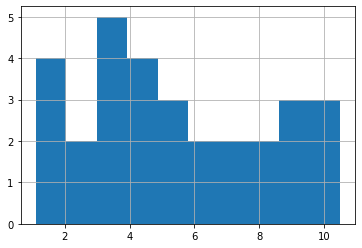

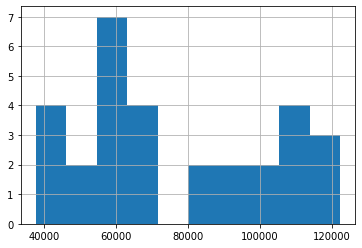

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


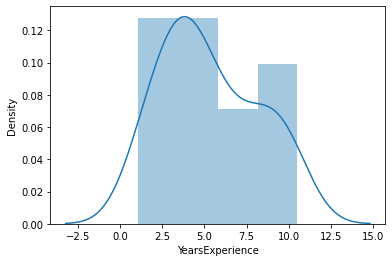

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


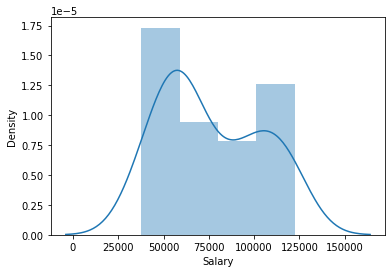

In [9]:
#Visualisation
dataset['YearsExperience'].hist()
plt.show()
dataset['Salary'].hist()
plt.show()
sns.distplot(dataset['YearsExperience'])
plt.show()
sns.distplot(dataset['Salary'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


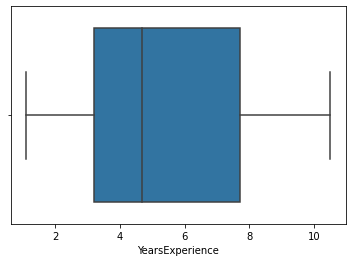

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


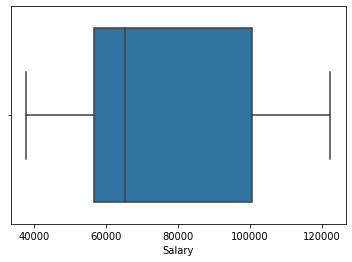

In [11]:
#Box PLot to see outliers
sns.boxplot(dataset['YearsExperience'])
plt.show()
sns.boxplot(dataset['Salary'])

###No Outliers observed

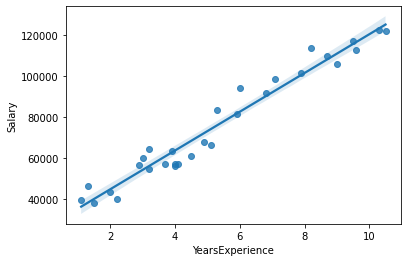

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [15]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])
plt.show()
dataset.corr()

0.978242 shows high positive correlation between variables

Raw Data modeling

#Modeling

##Row Data Modeling

In [16]:
X=dataset.iloc[:,0].values
y=dataset.iloc[:,1].values

In [17]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [18]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =0)

In [22]:
model1 = smf.ols("Salary~YearsExperience",data = dataset).fit() #ordinary least squaring method
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           1.14e-20
Time:                        06:04:20   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# Calculating Rootmeansquareerror for model 1
from ml_metrics import mse
pred_1=model1.predict(dataset['YearsExperience'])
rmse_1=np.sqrt(mse(dataset
                   ['Salary'],pred_1))
print("RMSE for first model is:",rmse_1)

RMSE for first model is: 5592.043608760662


In [36]:
y

array([-1.36011263, -1.10552744, -1.419919  , -1.20495739, -1.33978143,
       -0.71830716, -0.58815781, -0.79981746, -0.42881019, -0.69801306,
       -0.47433279, -0.74976858, -0.70662043, -0.70201994, -0.55250402,
       -0.29921736, -0.37004264,  0.26285865,  0.19885989,  0.66547573,
        0.58377993,  0.82623317,  0.93861127,  1.40274136,  1.24020308,
        1.09740238,  1.51986835,  1.3590738 ,  1.72102849,  1.70177321])

In [ ]:
#Predict for 5 and 6 years of experience
newdata=pd.Series([5,6])
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])
print(newdata)
print(data_pred)

0    5
1    6
dtype: int64
   YearsExperience
0                5
1                6


In [ ]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [ ]:
model.predict(data_pred)


0    73042.011806
1    82491.974127
dtype: float64

In [ ]:
#model parameter
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [ ]:
# Manually calculate for 5 and 6 years experience salary
Salary_5 = (25792.200199) + (9449.962321)*(5)
Salary_6 = (25792.200199) + (9449.962321)*(6)
print('5 years experience Salary - ', Salary_5)
print('6 years experience Salary - ', Salary_6)

5 years experience Salary -  73042.01180400001
6 years experience Salary -  82491.97412500001


Predicted value and calculated value are correct for 5 & 6 years experience salary


##Standardization

In [30]:
from sklearn.preprocessing import StandardScaler
array_salary=dataset.values
standard_salary= StandardScaler().fit(array_salary).transform(array_salary)
standard_salary[0:6]

array([[-1.51005294, -1.36011263],
       [-1.43837321, -1.10552744],
       [-1.36669348, -1.419919  ],
       [-1.18749416, -1.20495739],
       [-1.11581443, -1.33978143],
       [-0.86493538, -0.71830716]])

In [32]:
# Splitting the array into X and Y before fitting using OLS
X=standard_salary[:,0]
y=standard_salary[:,1]
model2 = sm.OLS(y,X).fit() 
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              644.7
Date:                Thu, 04 Aug 2022   Prob (F-statistic):                    2.33e-21
Time:                        06:09:54   Log-Likelihood:                          4.6151
No. Observations:                  30   AIC:                                     -7.230
Df Residuals:                      29   BIC:                                     -5.829
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9782      0.039     25.392      0.000       0.899       1.057
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# Calculating Rootmeansquareerror for model 2
pred_2=model2.predict(X)
rmse_2=np.sqrt(mse(y,pred_2))
print("RMSE for second model is:",rmse_2)

RMSE for second model is: 0.2074688792481693


#Normalization

In [37]:
from sklearn.preprocessing import MinMaxScaler
array_salary=dataset.values
norm_salary= MinMaxScaler().fit(array_salary).transform(array_salary)
norm_salary[0:5]

array([[0.        , 0.01904087],
       [0.0212766 , 0.1000945 ],
       [0.04255319, 0.        ],
       [0.09574468, 0.06843846],
       [0.11702128, 0.02551382]])

In [39]:
# Splitting ino X and Y 
X=norm_salary[:,0]
y=norm_salary[:,1]
model3=sm.OLS(y,X).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1957.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):                    3.58e-28
Time:                        06:13:58   Log-Likelihood:                          38.606
No. Observations:                  30   AIC:                                     -75.21
Df Residuals:                      29   BIC:                                     -73.81
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0210      0.023     44.238      0.000       0.974       1.068
==============================================================================
Omnibus:                        1.478   Durbin-Watson:                   1.605
Prob(Omnibus):                  0.478   Jarque-Bera (JB):                1.229
Skew:                           0.310   Prob(JB):                        0.541
Kurtosis:                       2.226   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# Calculating Rootmeansquareerror for model 3
pred_3=model3.predict(X)
rmse_3=np.sqrt(mse(y,pred_3))
print("RMSE for second model is:",rmse_3)

RMSE for second model is: 0.06681594717770253


##Transformation

In [41]:
dataset2=dataset.copy()
dataset2['TSalary']=np.log(dataset2['Salary'])
dataset2.head()

,YearsExperience,Salary,TSalary
0,1.1,39343.0,10.580073
1,1.3,46205.0,10.740843
2,1.5,37731.0,10.538237
3,2.0,43525.0,10.681091
4,2.2,39891.0,10.593906


In [42]:
dataset2['YearsExperience'].corr(dataset2['TSalary'])

0.9653844412504377

In [44]:
model4 = smf.ols("TSalary~YearsExperience",data = dataset2).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                TSalary   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           7.03e-18
Time:                        06:19:01   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
pred_4=model4.predict(dataset2['YearsExperience'])
rmse_4=np.sqrt(mse(dataset2['TSalary'],pred_4))
print("RMSE for fourth model is:",rmse_4)

RMSE for fourth model is: 0.09457436847280705


###Consolidated model results

In [48]:
result_dataset=pd.DataFrame({'Models':['Row data modeling','Standardization','Transformation on y','Normalization'],'R values':[model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared],
                        'RMSE':[rmse_1,rmse_2,rmse_3,rmse_4]})
result_dataset

,Models,R values,RMSE
0,Row data modeling,0.956957,5592.043609
1,Standardization,0.956957,0.207469
2,Transformation on y,0.985398,0.066816
3,Normalization,0.931967,0.094574


##### Model 4, Normalization is having High R squared value of 0.9853 and Least error of 6.6%